**Problem**    
Build a machine learning model that predicts the genre of a song directly from Spotify data, using its audio features obtained through the Spotify API.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("spotify_songs.csv", encoding="utf-8")
display(data.head())

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# cleaning dataset

In [ ]:
df = data.drop_duplicates().dropna()
print(len(data),len(df))


32833 32828


There are almost no songs that share all the same characteristics, but let's look via the track IDs to see if there are any duplicates.

In [ ]:
df.groupby("track_id").size().sort_values(ascending=False).head(10)

,0
track_id,
7BKLCZ1jbUBVqRi2FVlTVw,10
3eekarcy7kvN4yt5ZFzltW,9
14sOS5L36385FJ3OL8hew4,9
2Fxmhks0bxGSBdJ92vM42m,8
7LzouaWGFCy4tkXDOOnEyM,8
6wo37KVqFJhtuxPTpLCcfe,8
6WrI0LAC5M1Rw2MnX2ZvEg,8
2b8fOow8UzyDFAE27YhOZM,8
3ZCTVFBt2Brf31RLEnCkWJ,8


Let's display the characteristics of the most frequently used song to see what the differences are.

In [ ]:
df.loc[df.track_id == df.groupby("track_id").size().sort_values(ascending=False).index[0], :]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


The song "Closer (feat. Halsey)" appears several times with the same characteristics but in different playlists (and therefore sometimes even different genres). It's necessary to keep only one to avoid adding "noise".


In [ ]:
most_frequent_genre = df.groupby('track_id')['playlist_genre'].agg(
    lambda x: x.value_counts().index[0]
)
df = df.drop_duplicates(subset=['track_id'], keep='first').copy()
df['playlist_genre'] = df['track_id'].map(most_frequent_genre)
print(len(data),len(df))

32833 28352


In [ ]:
df1 = df[
    (df['duration_ms'] >= 30000) &
    (df['duration_ms'] <= 420000)
].copy()
print(len(data),len(df),len(df1))

32833 28352 27986



# 1. Descriptive analysis of your data


| Variable                  | Classe     | Description |
|---------------------------|------------|-------------|
| track_id                 | character  | Song unique ID |
| track_name               | character  | Song Name |
| track_artist             | character  | Song Artist |
| track_popularity         | double     | Song Popularity (0-100) where higher is better |
| track_album_id           | character  | Album unique ID |
| track_album_name         | character  | Song album name |
| track_album_release_date | character  | Date when album released |
| playlist_name            | character  | Name of playlist |
| playlist_id              | character  | Playlist ID |
| playlist_genre           | character  | Playlist genre |
| playlist_subgenre        | character  | Playlist subgenre |
| danceability             | double     | Danceability describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and regularity (0.0 to 1.0). |
| energy                   | double     | Perceptual measure of intensity and activity (0.0 to 1.0). |
| key                      | double     | Estimated key of the track (0 = C, 1 = C♯/D♭, ..., 11 = B; -1 = no key detected). |
| loudness                 | double     | Overall loudness in decibels (dB), typically between -60 and 0. |
| mode                     | double     | Modality of the track: 1 = major, 0 = minor. |
| speechiness              | double     | Presence of spoken words (0.0 to 1.0). Higher = more speech-like. |
| acousticness             | double     | Confidence that the track is acoustic (0.0 to 1.0). |
| instrumentalness         | double     | Likelihood the track contains no vocals (0.0 to 1.0). |
| liveness                 | double     | Probability the track was performed live (0.0 to 1.0). |
| valence                  | double     | Musical positiveness (0.0 = sad, 1.0 = happy). |
| tempo                    | double     | Estimated tempo in beats per minute (BPM). |
| duration_ms              | double     | Duration of the song in milliseconds. |

In [ ]:

from collections import Counter
df = df1
genre_counts = Counter(df['playlist_genre'].tolist())
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")
df['playlist_subgenre'].unique()

pop: 4924
edm: 4788
latin: 4205
r&b: 4507
rap: 5328
rock: 4234


array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [ ]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Correlation between features and genres :
tempo                  0.271584
speech_instru_ratio    0.166429
speechiness            0.139379
rhythmic_power         0.129406
danceability           0.116885
duration_ms            0.104637
acousticness           0.094808
energy                 0.094242
instrumentalness       0.093540
loudness               0.075416
valence                0.041303
mood                   0.033215
duration_cat           0.022358
liveness               0.019538
key                    0.012546
mode                   0.003344
dtype: float64


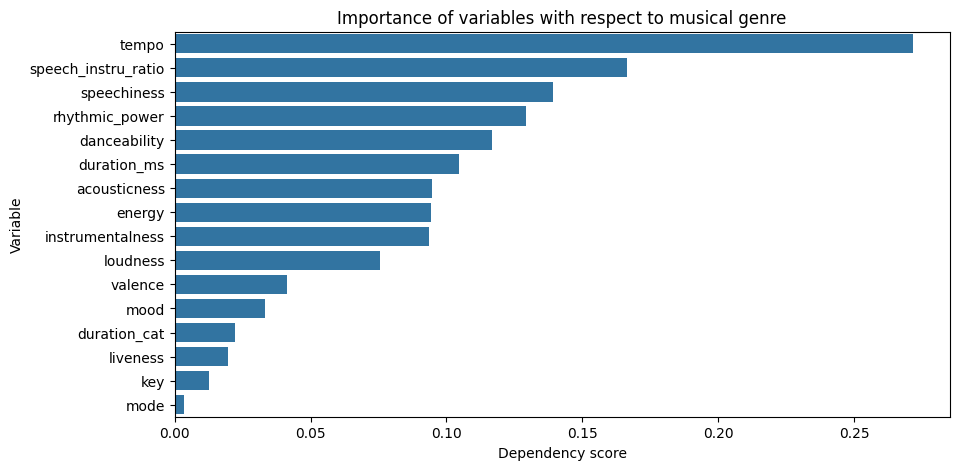

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt


#preprocessing : feature engineering

df['mood'] = df['energy'] * df['valence']
df['rhythmic_power'] = df['energy'] * df['tempo']
df['speech_instru_ratio'] = df['speechiness'] / (df['instrumentalness'] + 0.0001)
df['duration_cat'] = pd.cut(
    df['duration_ms'],
    bins=[0, 180000, 300000, 6000000], #(0s, 3min,5min, le reste)
    labels=[0, 1, 2]  # 0=Court, 1=Standard, 2=Long
).astype(int)


# Keep only usefull columns
num_cols = ['danceability', 'energy','key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'mood', 'rhythmic_power', 'speech_instru_ratio','duration_cat'
            ]




df = df.dropna(subset=num_cols + ['playlist_genre'])


le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['playlist_genre'])
# Non linear correlation
X = df[num_cols]
y = df['genre_encoded']

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=num_cols).sort_values(ascending=False)




print("Correlation between features and genres :")
print(mi_series)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series, y=mi_series.index)
plt.title("Importance of variables with respect to musical genre")
plt.xlabel("Dependency score")
plt.ylabel("Variable")
plt.show()

In [ ]:
df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,mood,rhythmic_power,speech_instru_ratio,duration_cat,genre_encoded
count,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000,27986.000000
mean,39.492675,0.653674,0.698353,5.366004,-6.789927,0.564997,0.108405,0.177864,0.087461,0.190989,0.511695,120.911029,223519.338419,0.363833,85.192633,717.108852,0.897377,2.503252
std,23.675897,0.145147,0.183701,3.614633,3.029669,0.495766,0.102917,0.223098,0.227590,0.155247,0.233617,27.015901,55070.143578,0.199650,30.982601,1021.107246,0.527780,1.692812
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,31429.000000,0.000002,0.029586,0.024325,0.000000,0.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.264750,0.000000,0.041000,0.014600,0.000000,0.092800,0.330000,99.954250,187386.750000,0.203300,63.082803,11.263459,1.000000,1.000000
50%,43.000000,0.670000,0.722000,6.000000,-6.231000,1.000000,0.062900,0.080450,0.000019,0.127000,0.513000,121.980000,216054.500000,0.347721,83.699537,349.000000,1.000000,3.000000
75%,58.000000,0.759000,0.843000,9.000000,-4.689000,1.000000,0.134000,0.261000,0.005650,0.250000,0.695000,134.001000,253108.500000,0.507569,107.261464,861.890280,1.000000,4.000000
max,100.000000,0.981000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.994000,0.991000,239.440000,420000.000000,0.965196,198.474380,9180.000000,2.000000,5.000000


In [ ]:
features = ['danceability', 'energy','key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'mood', 'rhythmic_power', 'speech_instru_ratio','duration_cat'
            ]
target='playlist_genre'

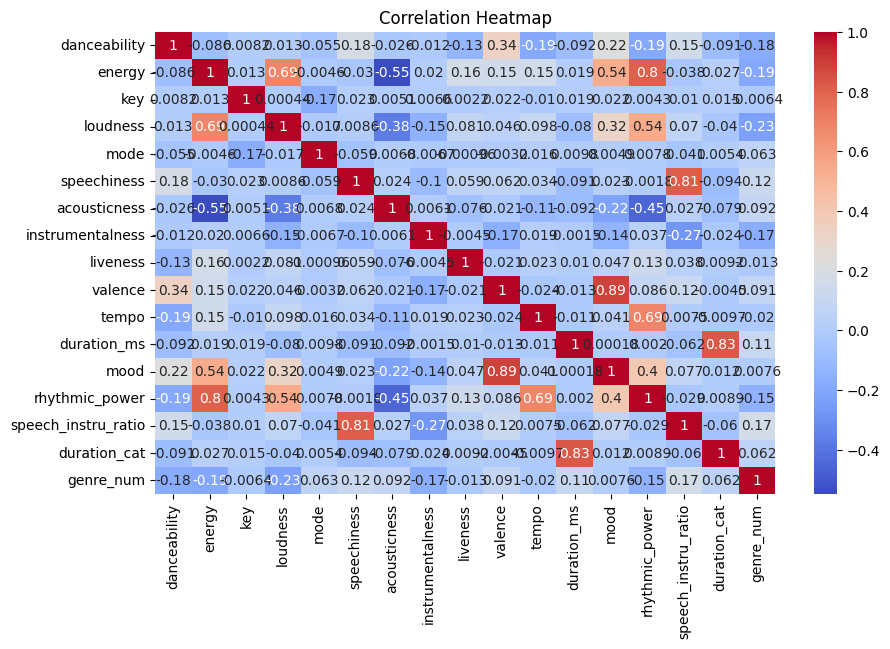

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['genre_num'] = le.fit_transform(df['playlist_genre'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features + ['genre_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

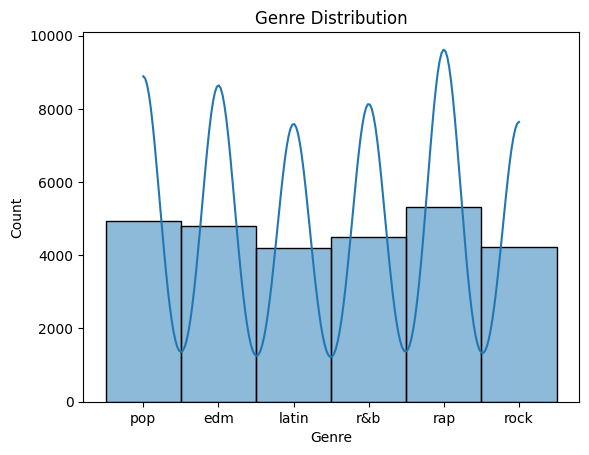

In [ ]:
sns.histplot(df['playlist_genre'], bins=30, kde=True)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# Training

In [ ]:
X = df[features]
y = df['genre_num']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

# **Prediction**

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
display(y_pred)

array([1, 2, 0, ..., 4, 3, 3])

In [ ]:
# Display the number → gender equivalence
mapping = {i: genre for i, genre in enumerate(le.classes_)}
print("\n number → gender equivalence :")
for num, genre in mapping.items():
    print(f"{num} → {genre}")


 number → gender equivalence :
0 → edm
1 → latin
2 → pop
3 → r&b
4 → rap
5 → rock


In [ ]:
def get_features_by_track_id(df, track_id, feature_columns):
    row = df[df['track_id'] == track_id]
    if row.empty:
        return None
    features_dict = row[feature_columns].iloc[0].to_dict()
    return features_dict

In [ ]:
get_features_by_track_id(df,'3eekarcy7kvN4yt5ZFzltW',num_cols)

{'danceability': 0.598,
 'energy': 0.427,
 'key': 7.0,
 'loudness': -8.764,
 'mode': 0.0,
 'speechiness': 0.0317,
 'acousticness': 0.0546,
 'instrumentalness': 5.83e-06,
 'liveness': 0.21,
 'valence': 0.0605,
 'tempo': 76.469,
 'duration_ms': 175721.0,
 'mood': 0.0258335,
 'rhythmic_power': 32.652263,
 'speech_instru_ratio': 299.53699329112726,
 'duration_cat': 0.0}

In [ ]:
import numpy as np
import pandas as pd

track_features = {'danceability': 0.5531472859615902, 'energy': 0.8755669103529218, 'key': 2.8, 'loudness': -13.685795599687227, 'mode': 0.0, 'speechiness': 0.019477854237186575, 'acousticness': 0.059361057783767254, 'instrumentalness': 4.9471128116646045e-06, 'liveness': 0.22702814902710808, 'valence': 0.04585802304010202, 'tempo': 76.4689999985046, 'duration_ms': 174949.5317802476, 'mood': 0.04015176754811523, 'rhythmic_power': 58.39080698600752, 'speech_instru_ratio': 471.95202796116797, 'duration_cat': 'short'}

track_features['tempo'] = float(track_features['tempo'])


duration_mapping = {'short': 0, 'medium': 1, 'long': 2}
track_features['duration_cat'] = duration_mapping[track_features['duration_cat']]


X_new = pd.DataFrame([track_features])


y_pred_new = model.predict(X_new)
display(y_pred_new)


array([5])

Multiclass Model Evaluation :
Accuracy  : 0.577
Precision : 0.572
Recall    : 0.577
F1-score  : 0.571
Full Classification Report
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       965
           1       0.53      0.38      0.44       832
           2       0.42      0.43      0.43       972
           3       0.53      0.47      0.50       896
           4       0.61      0.72      0.66      1087
           5       0.65      0.73      0.69       846

    accuracy                           0.58      5598
   macro avg       0.57      0.57      0.57      5598
weighted avg       0.57      0.58      0.57      5598



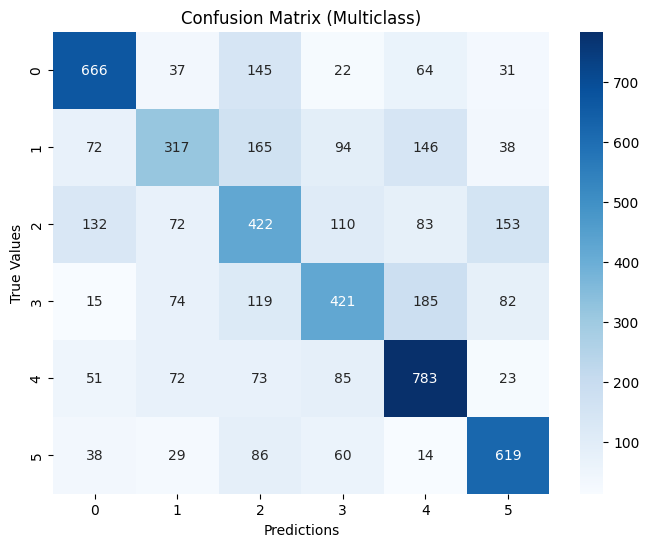

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt






# Global score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Multiclass Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

print("Full Classification Report")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Multiclass)")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,

    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGB before pipeline Evaluation :")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

Accuracy: 0.5682386566630939
XGB before pipeline Evaluation :
Precision : 0.566
Recall    : 0.568
F1-score  : 0.565


In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

preprocess = ColumnTransformer([
    ('scale', StandardScaler(), features)
])

pipe = Pipeline([
    ('prep', preprocess),
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        random_state=42
    ))
])


pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGB Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")


Accuracy: 0.5735977134690962
XGB Model Evaluation :
Accuracy  : 0.574
Precision : 0.572
Recall    : 0.574
F1-score  : 0.570


We see that XGB is better without using a pipeline.

We scal the features to try KNN and SVM model.

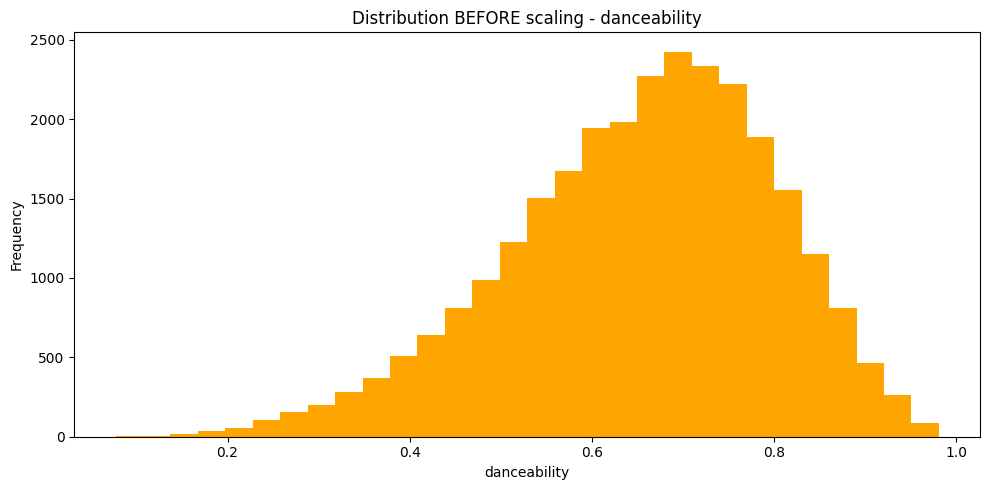

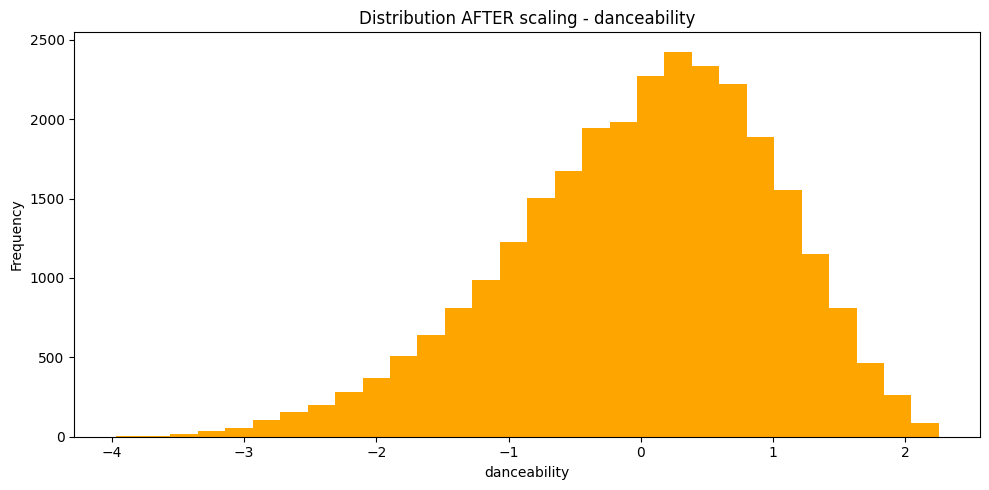

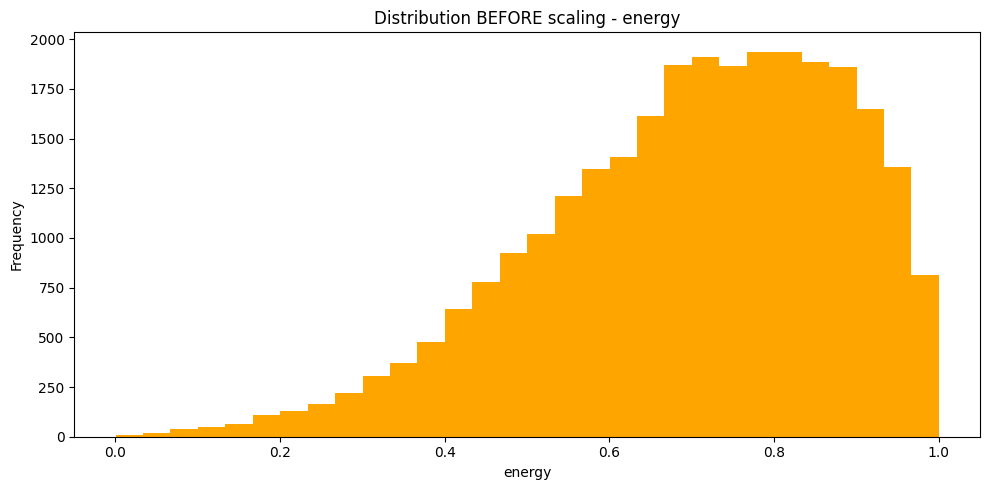

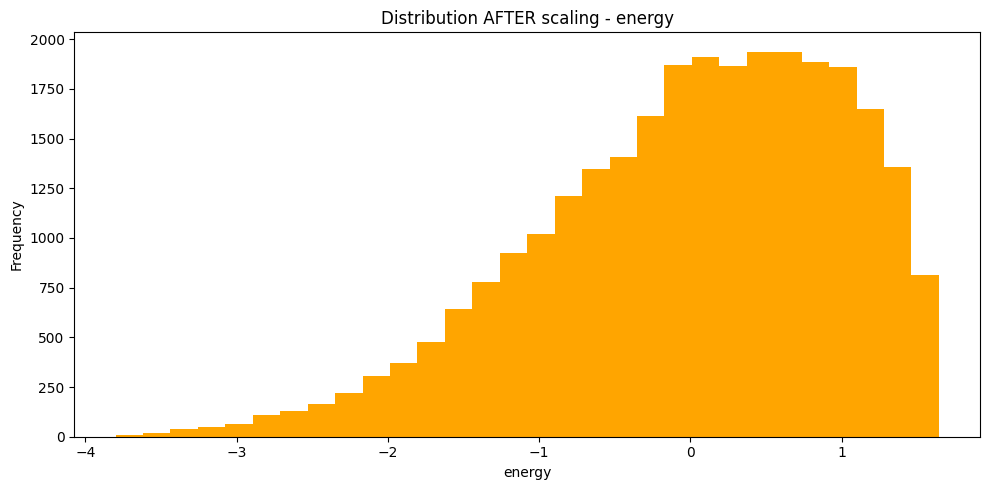

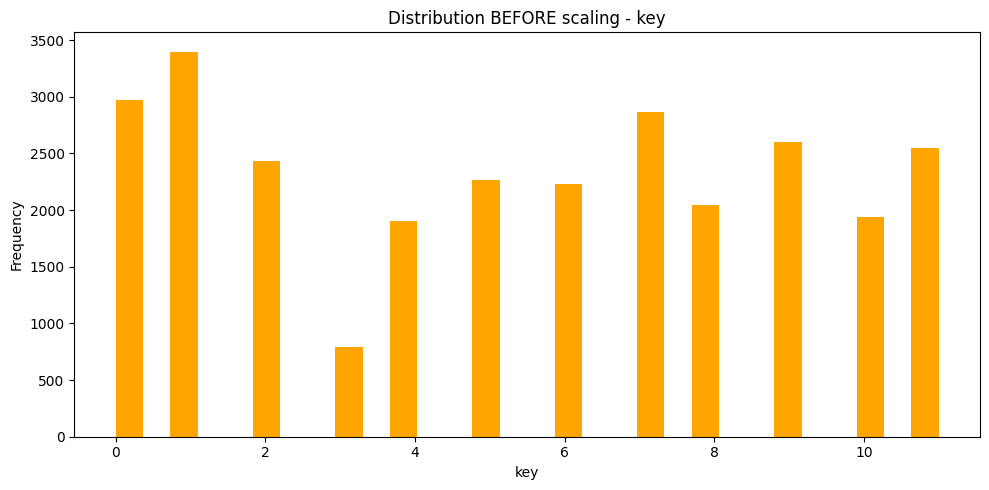

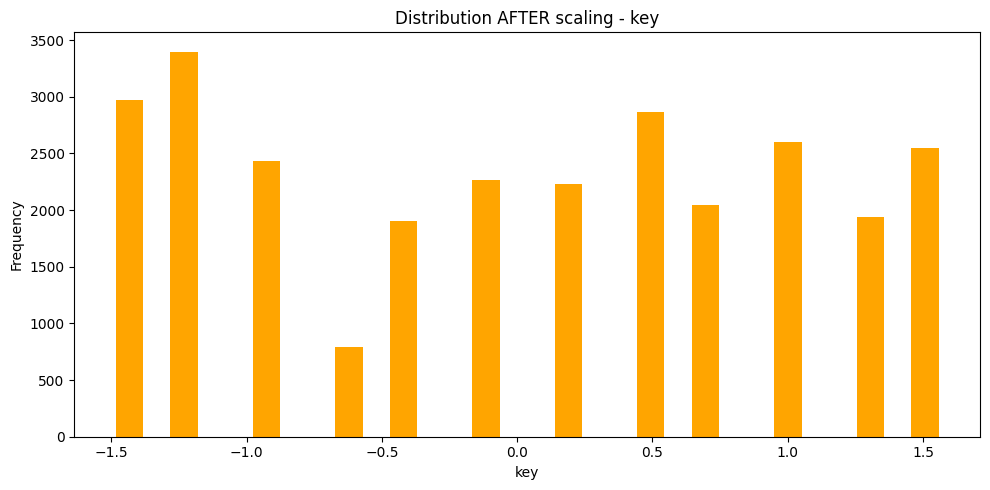

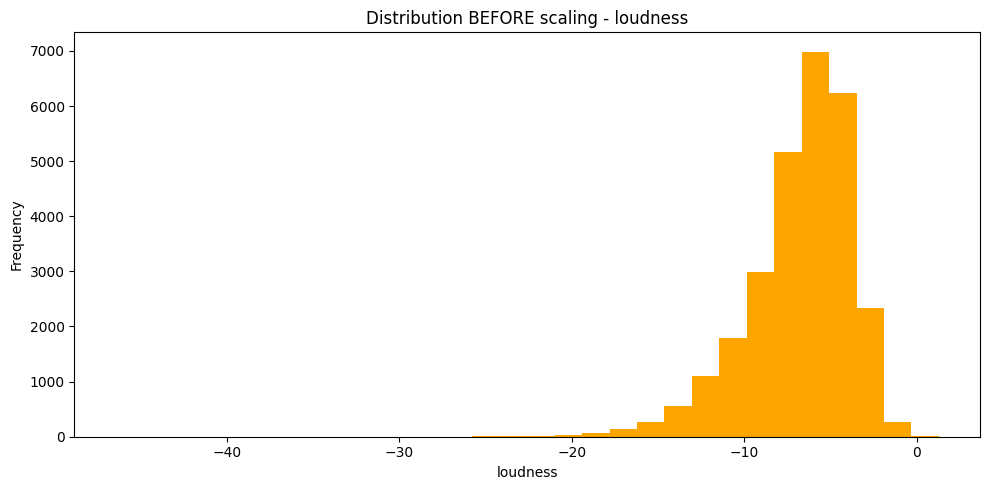

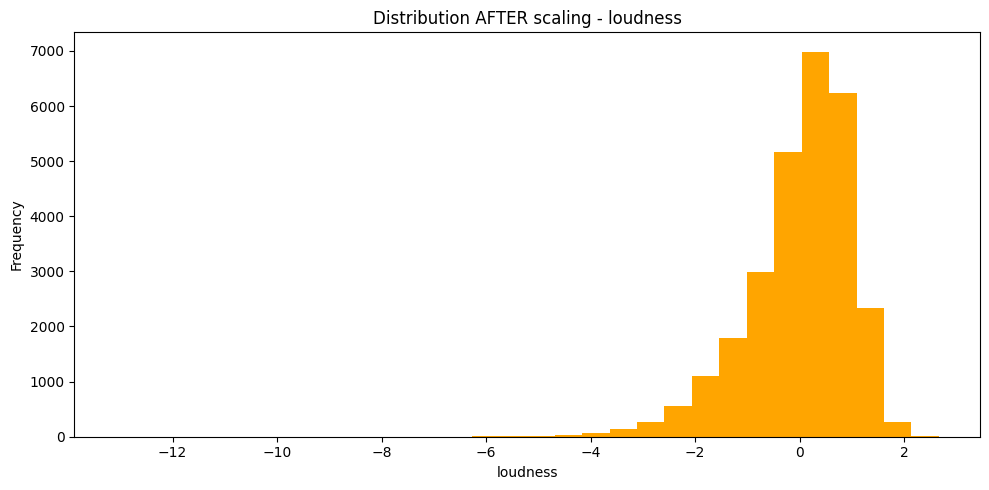

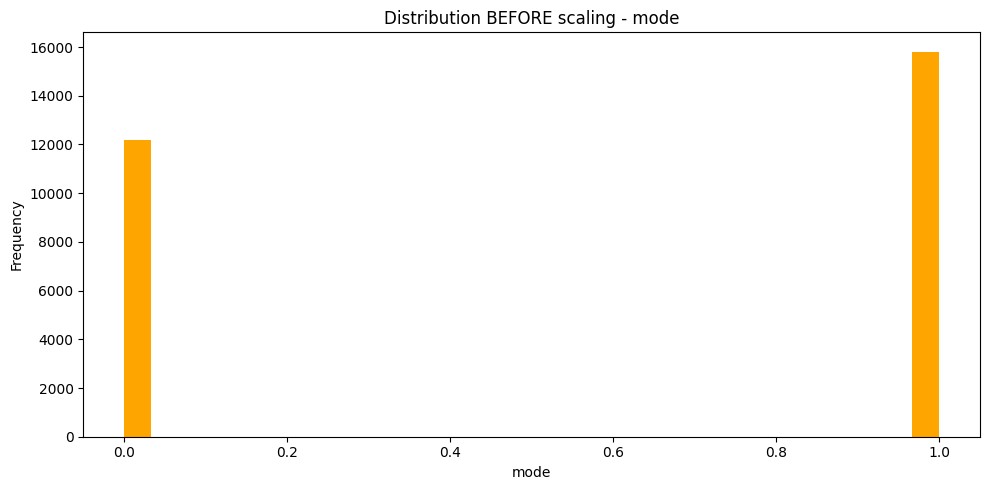

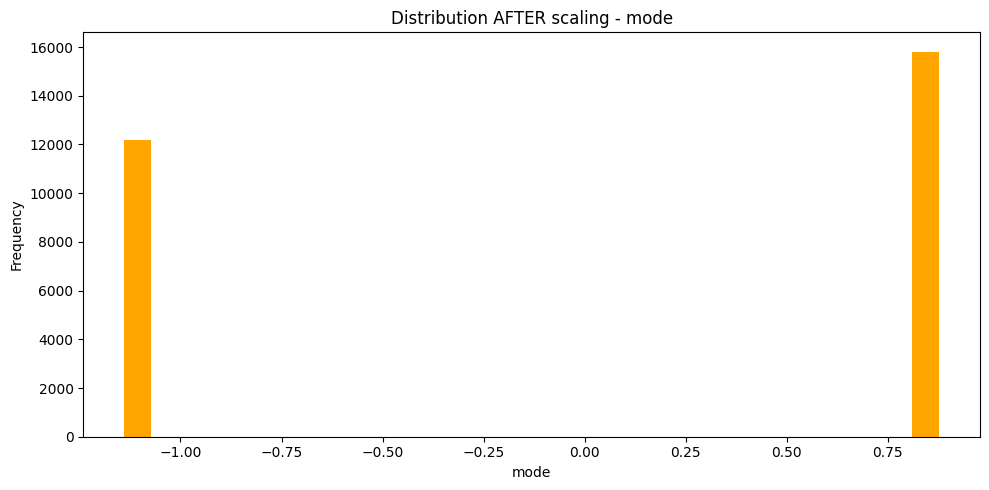

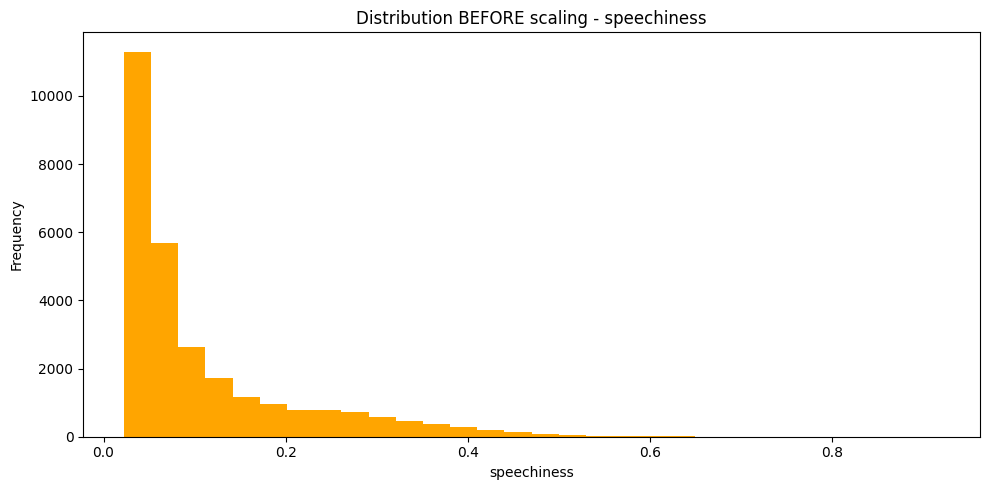

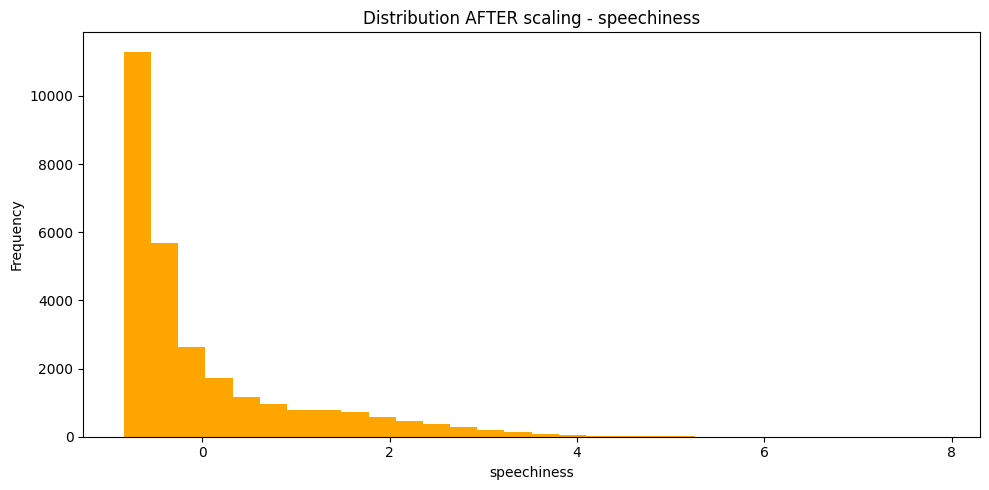

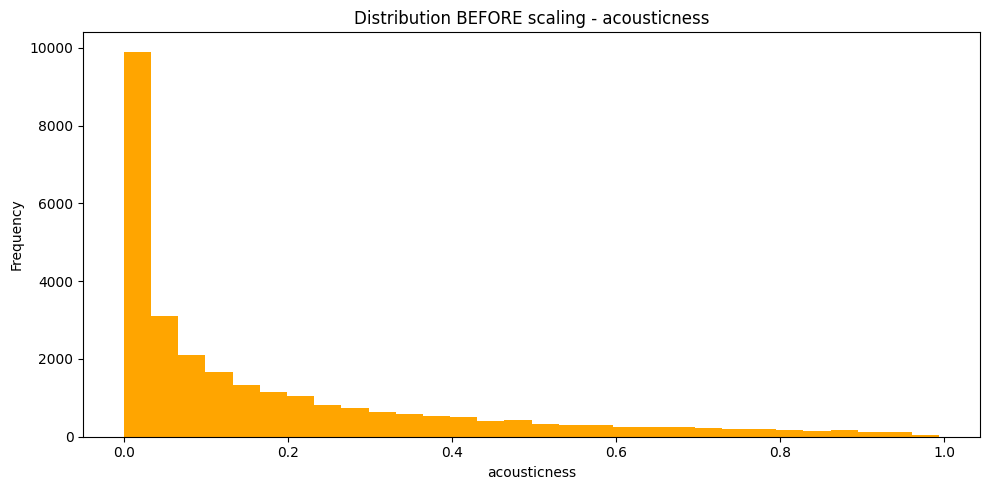

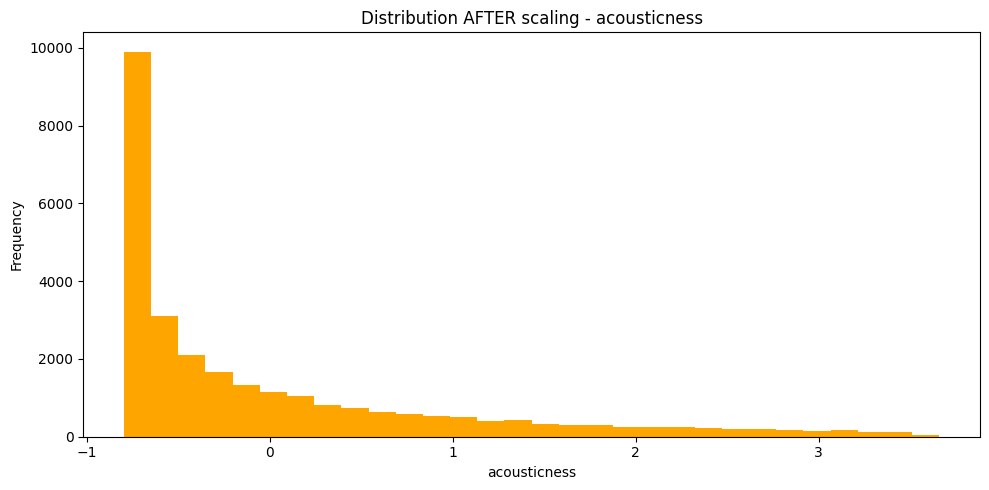

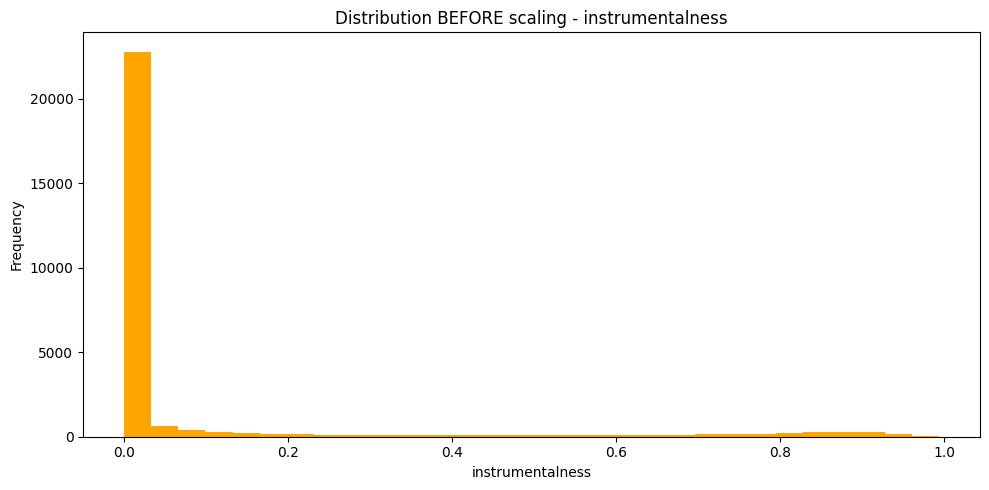

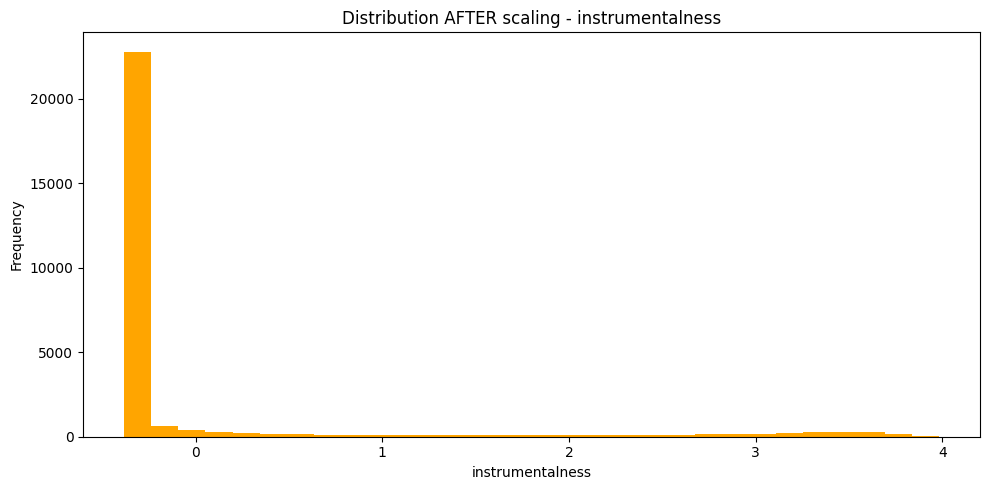

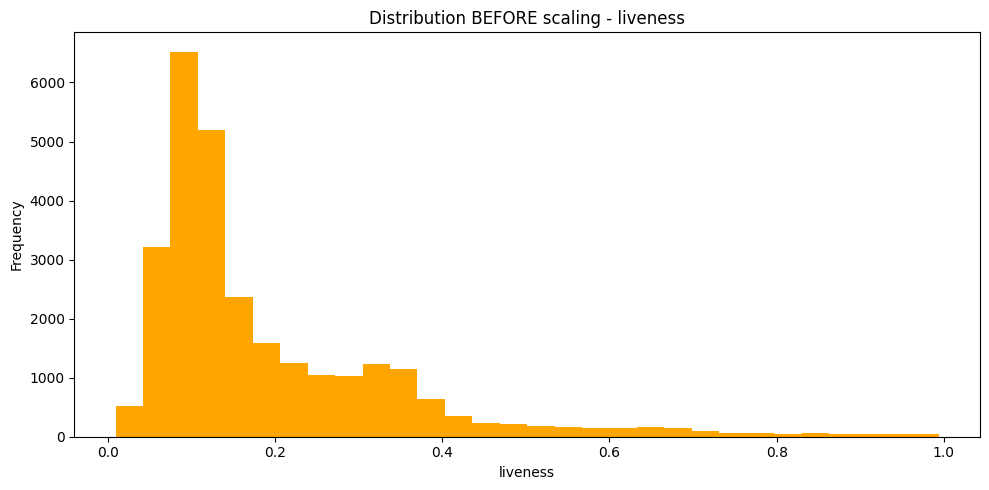

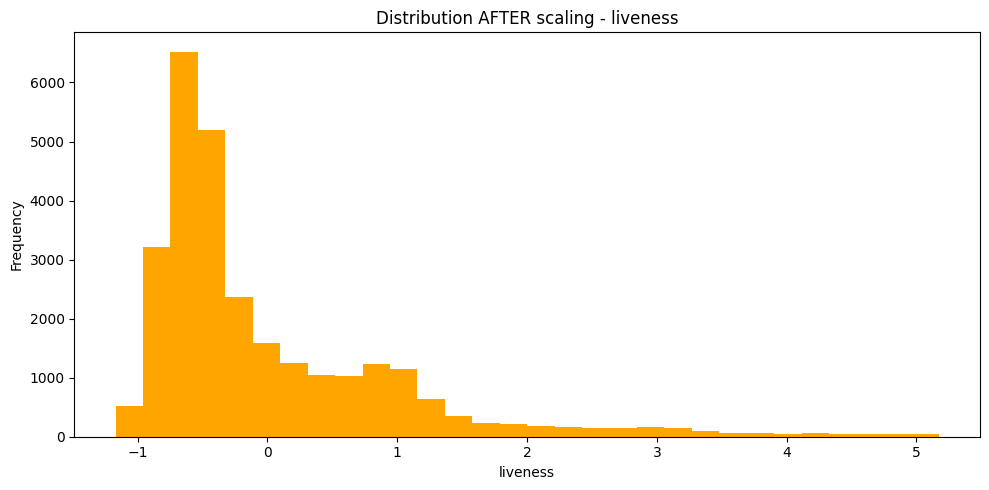

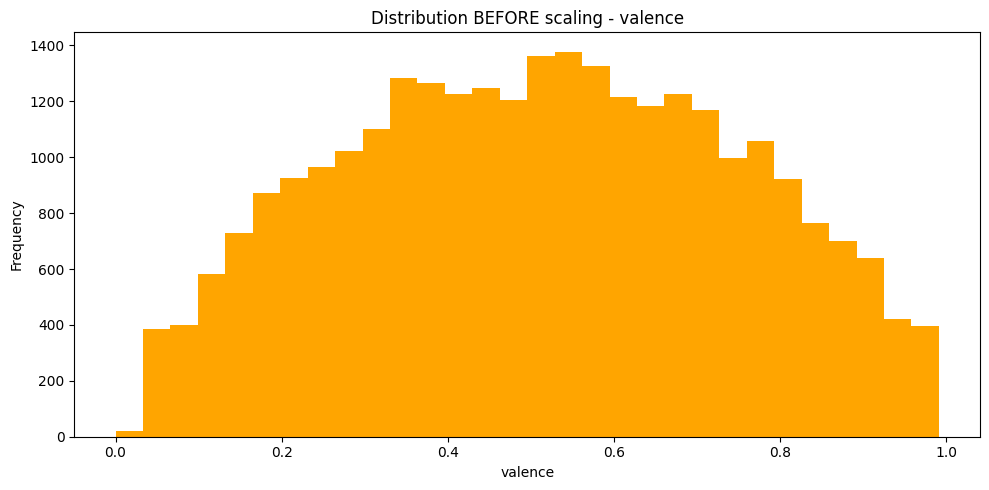

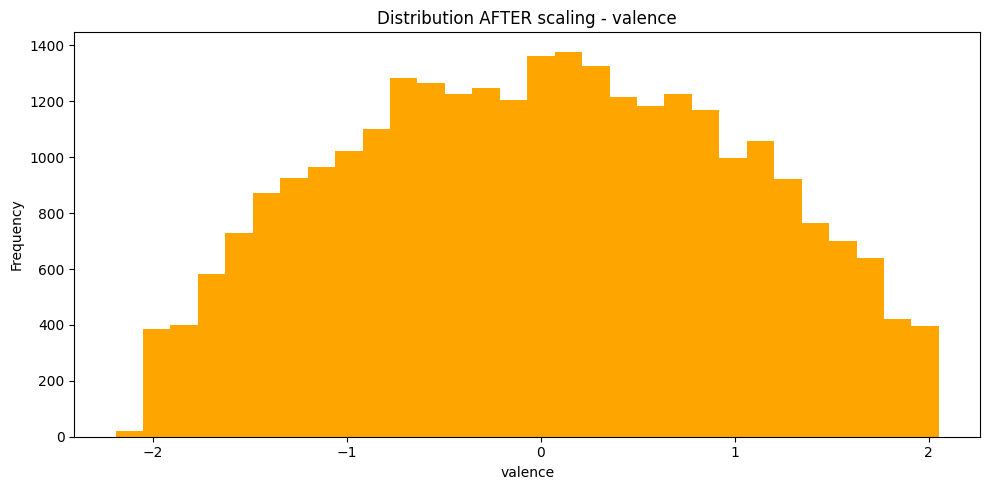

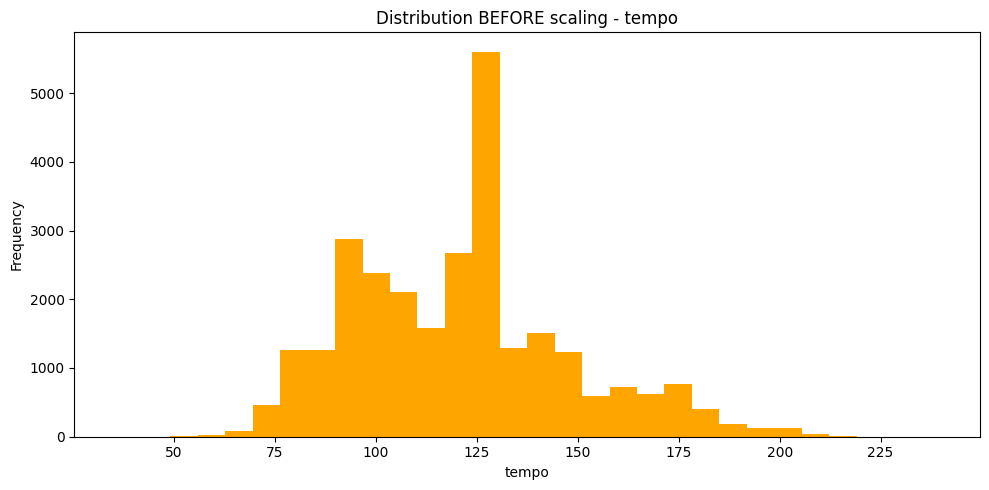

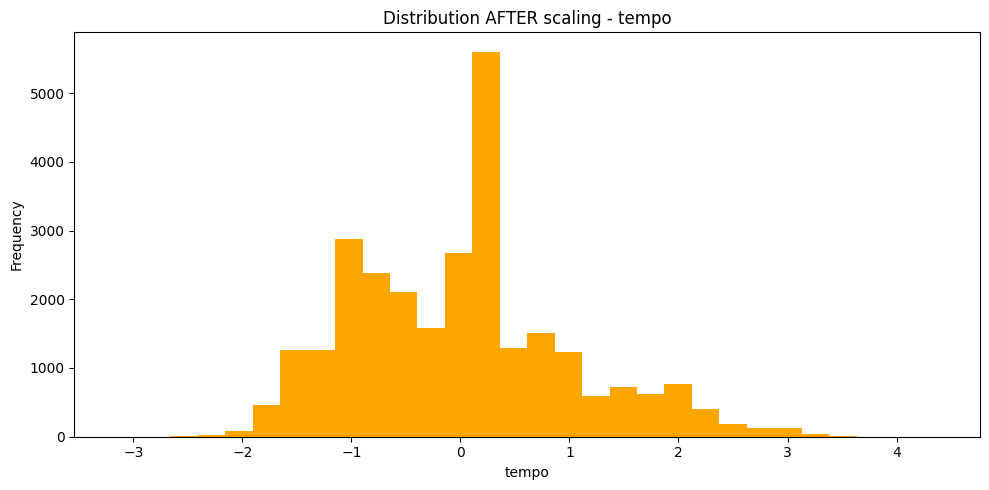

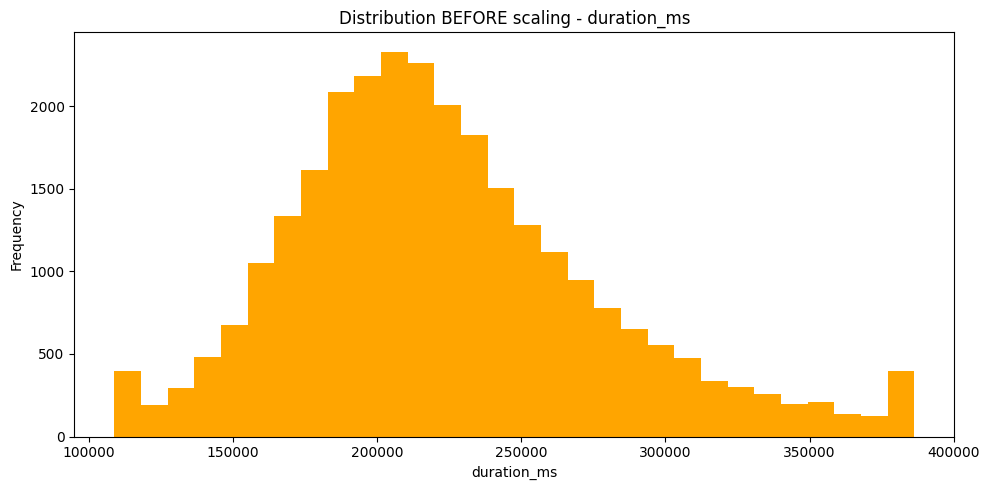

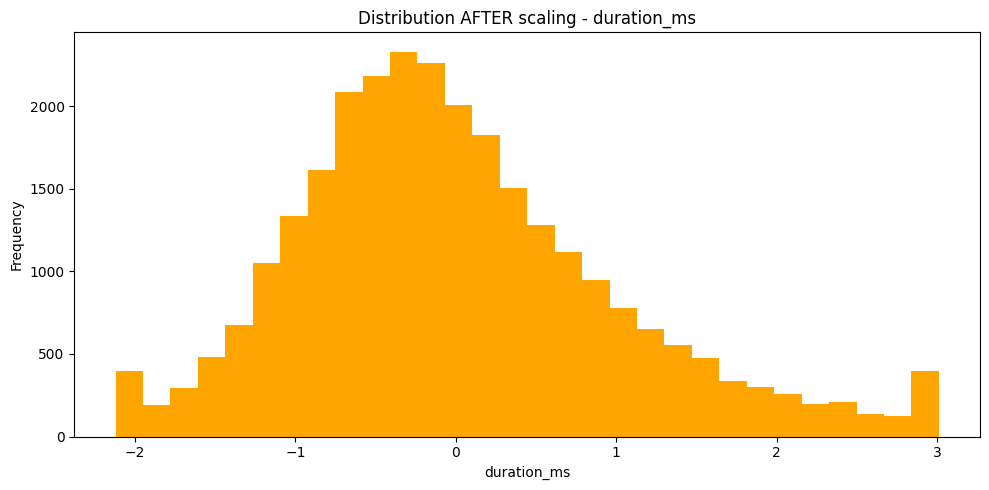

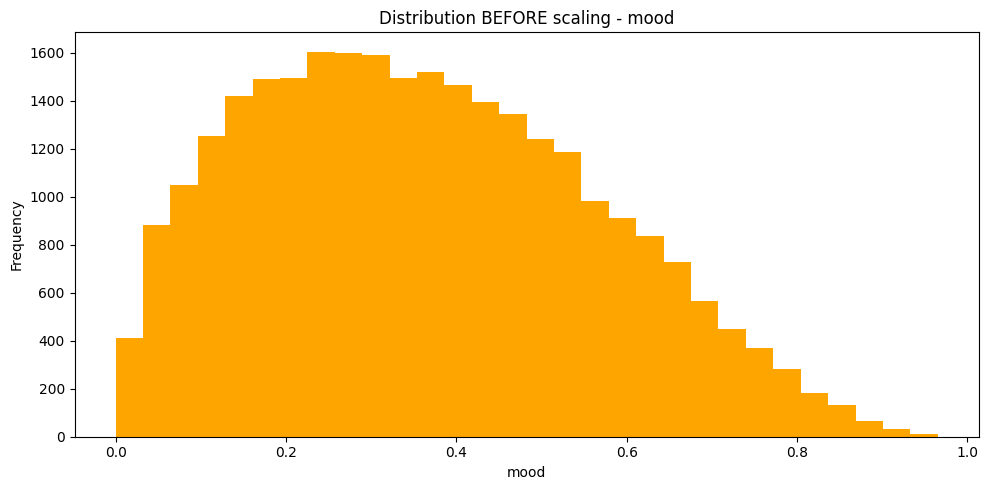

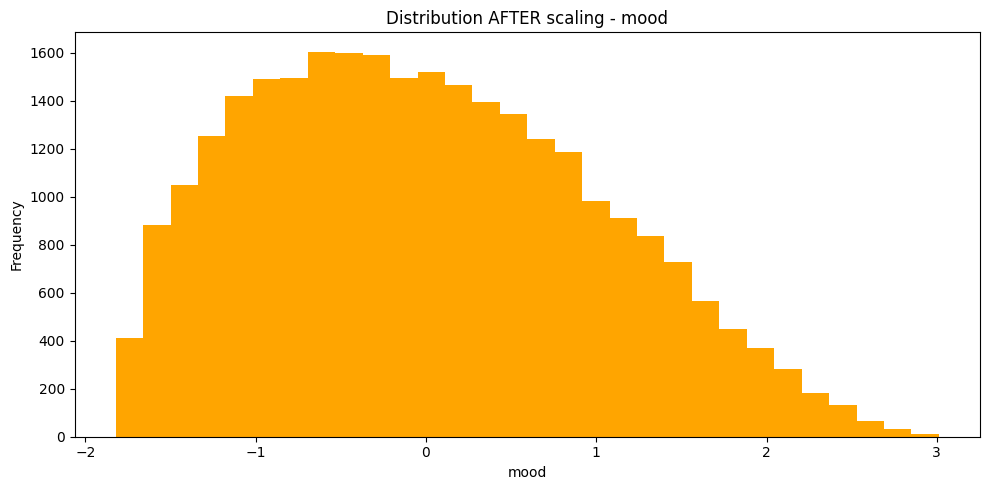

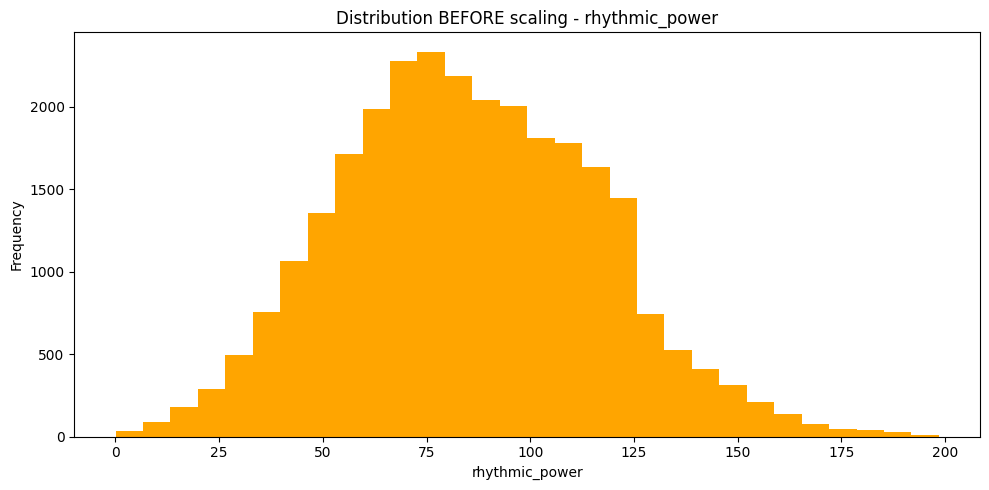

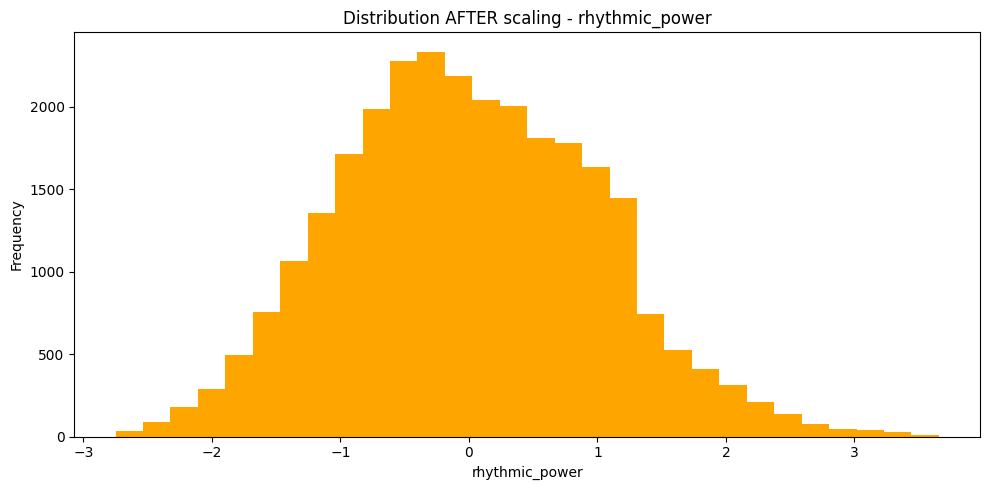

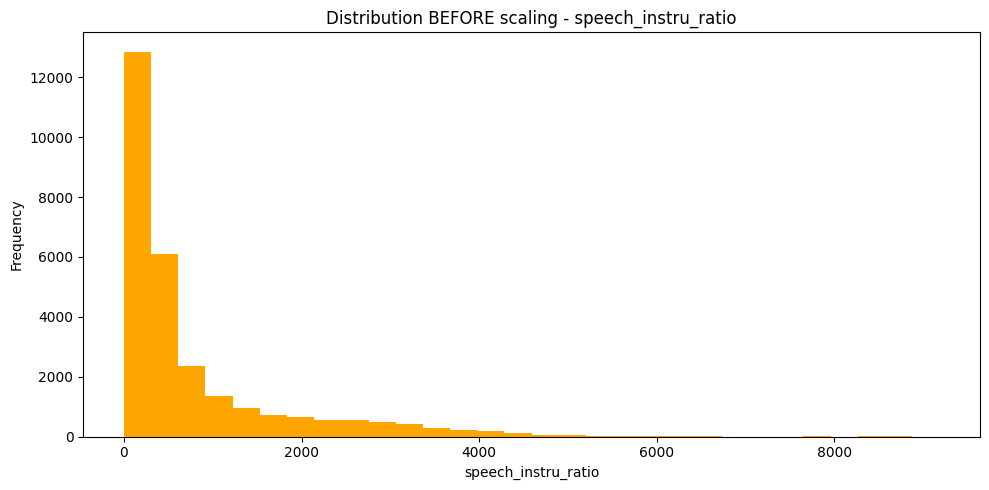

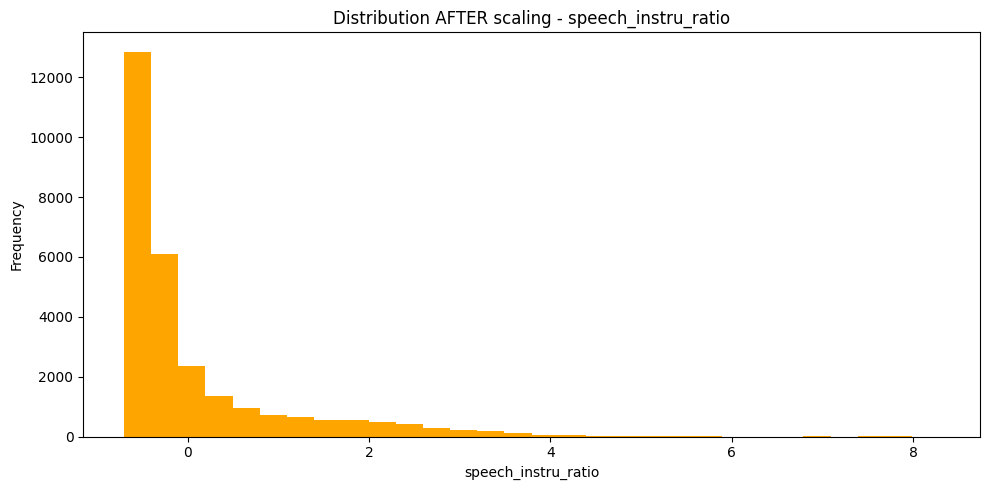

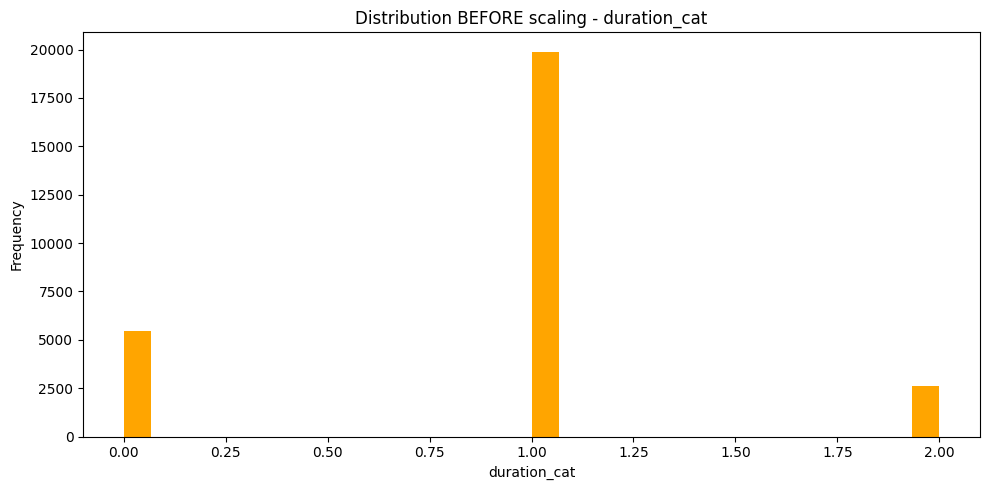

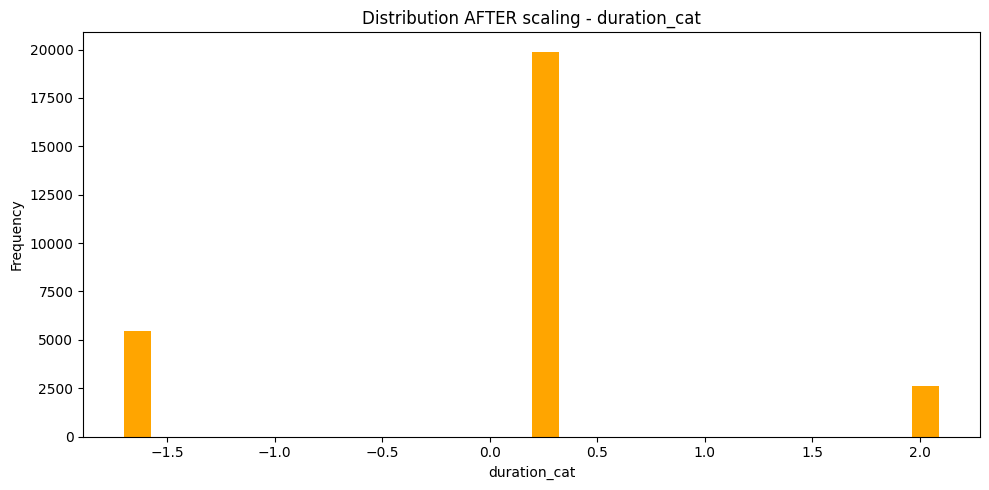

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled = pd.DataFrame(X_scaled, columns=features)

for col in features:
    plt.figure(figsize=(10,5))
    plt.hist(df[col].dropna(), bins=30, color="orange")
    plt.title(f"Distribution BEFORE scaling - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,5))
    plt.hist(X_scaled[col].dropna(), bins=30, color="orange")
    plt.title(f"Distribution AFTER scaling - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



Applying Principal Component Analysis (PCA) to reduce feature space complexity while retaining 95% of the variance. Visualizing the first two components to observe potential clusters among music genres.

PCA : Nombre de composantes retenues pour 95% de variance : 11


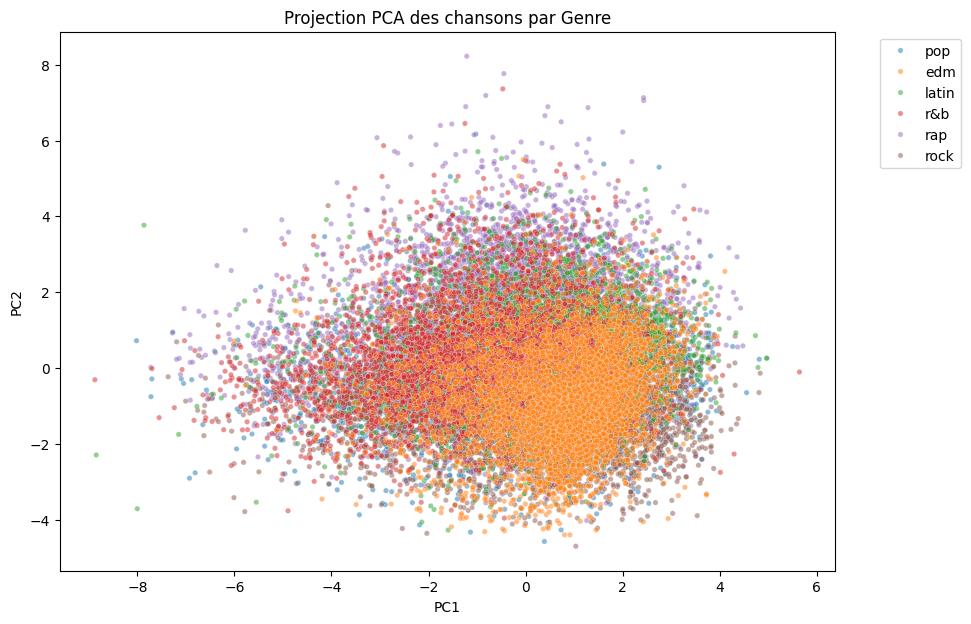

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA : Number of components retained for 95% of variance : {pca.n_components_}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['playlist_genre'], alpha=0.5, s=15)
plt.title("PCA projection of songs by genre")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
y_pred = pipe.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Multiclass Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

Multiclass Model Evaluation :
Accuracy  : 0.574
Precision : 0.572
Recall    : 0.574
F1-score  : 0.570


In [ ]:
from sklearn.svm import SVC
# Preprocessing = StandardScaler
preprocess = ColumnTransformer([
    ('scale', StandardScaler(), features)
])

svm_model = Pipeline([
    ('prep', preprocess),
    ('svm', SVC(kernel='rbf', C=3, gamma='scale'))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

SVM Model Evaluation :
Accuracy  : 0.544
Precision : 0.541
Recall    : 0.544
F1-score  : 0.540


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline([
    ('prep', preprocess),
    ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance'))
])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Model Evaluation :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

KNN Model Evaluation :
Accuracy  : 0.489
Precision : 0.489
Recall    : 0.489
F1-score  : 0.488


After trying RandomForest, XGBoost, SVM and KNN, we conclude that the best model for this dataset is the RandomForest classifier. Now we are going to try a gridSearch on this model.


In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [200],
    'max_depth': [8, 12, 15],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 8]
}

grid_fast = GridSearchCV(
    rf,
    params,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_fast.fit(X_train, y_train)

print("Best RF score:", grid_fast.best_score_)
print("Best RF params:", grid_fast.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best RF score: 0.5563248390382577
Best RF params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


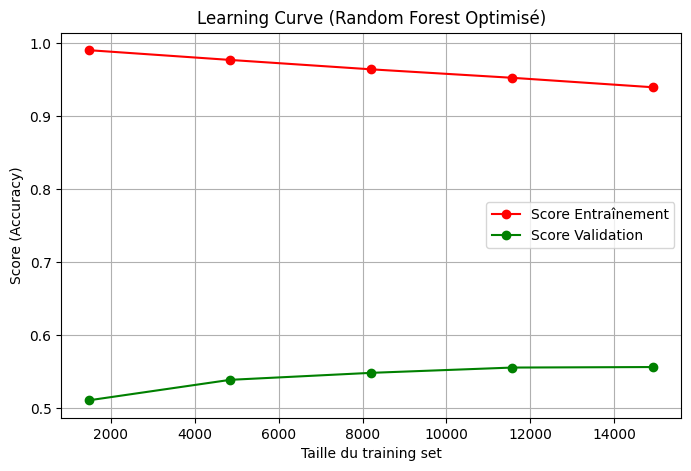

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=3):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.xlabel("Taille du training set")
    plt.ylabel("Score (Accuracy)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score Entraînement")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score Validation")
    plt.legend(loc="best")
    plt.grid()
    return plt


plot_learning_curve(grid_fast.best_estimator_, "Learning Curve (Random Forest Optimisé)", X_train, y_train)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100,200],
    'max_depth': [5, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [10,15],
    'min_samples_leaf': [8,15]
}

search = RandomizedSearchCV(
    rf,
    params,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [8, 15],
                                        'min_samples_split': [10, 15],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

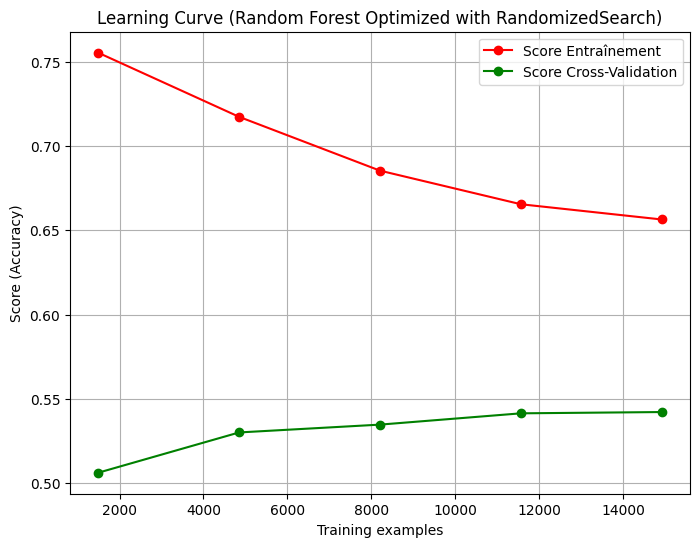

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=-1):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score (Accuracy)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score Entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score Cross-Validation")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(search.best_estimator_,
                    "Learning Curve (Random Forest Optimized with RandomizedSearch)",
                    X_train, y_train, cv=3)

Hyperparameter tuning with aggressive constraints (max_depth, min_samples_leaf) failed to resolve the core issue of high variance (overfitting). Despite of lowering the Training Score, the Learning Curve still shows a large gap with the low Validation Score.